0


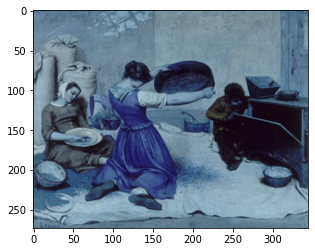

In [45]:
%matplotlib inline

import cv2 as cv
from matplotlib import pyplot as plt

# original_image = cv.imread('/content/ad-reinhardt_study-for-a-painting-1938-2.jpg')
original_image = cv.imread('/content/andrea-del-sarto_lament-of-christ.jpg')
# original_image = cv.imread('/content/mona.jpeg')
# original_image = cv.imread('/content/test_detec.jpg')
# original_image = cv.imread('/content/andrea-mantegna_adoration-of-the-magi-1500.jpg')
# original_image = cv.imread('/content/abst1.jpg')
# original_image = cv.imread('/content/abst2.jpg')
# original_image = cv.imread('/content/tarsele-table-extensible-plaque-chene-noir__0944977_pe797515_s5.jpg')


# Convert color image to grayscale for Viola-Jones
grayscale_image = cv.cvtColor(original_image, cv.COLOR_BGR2GRAY)
face_cascade=cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_frontalface_default.xml")
detected_faces = face_cascade.detectMultiScale(grayscale_image,minNeighbors=15)
print(len(detected_faces))

for (column, row, width, height) in detected_faces:
    cv.rectangle(
        original_image,
        (column, row),
        (column + width, row + height),
        (0, 255, 0),
        2
    )
plt.imshow(original_image)
# cv.imshow('Image', original_image)
plt.show()
# cv.waitKey(0)
# cv.destroyAllWindows()

In [49]:

import os
import cv2
import dlib
from time import time

import matplotlib.pyplot as plt

# Get the HoG face detection model.
hog_face_detector = dlib.get_frontal_face_detector()
hog_face_detector

In [50]:
def hogDetectFaces(image, hog_face_detector, display = True):
    '''
    This function performs face(s) detection on an image using dlib hog face detector.
    Args:
        image:             The input image of the person(s) whose face needs to be detected.
        hog_face_detector: The hog face detection model required to perform the detection on the input image.
        display:           A boolean value that is if set to true the function displays the original input image, 
                           and the output image with the bounding boxes drawn and time taken written and returns nothing.
    Returns:
        output_image: A copy of input image with the bounding boxes drawn.
        results:      The output of the face detection process on the input image.
    '''
    
    # Get the height and width of the input image.
    height, width, _ = image.shape
    
    # Create a copy of the input image to draw bounding boxes on.
    output_image = image.copy()
    
    # Convert the image from BGR into RGB format.
    imgRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Get the current time before performing face detection.
    start = time()
 
    # Perform the face detection on the image.
    results = hog_face_detector(imgRGB, 0)
    
    # Get the current time after performing face detection.
    end = time()
 
    # Loop through the bounding boxes of each face detected in the image.
    for bbox in results:
        
        # Retrieve the left most x-coordinate of the bounding box.
        x1 = bbox.left()
        
        # Retrieve the top most y-coordinate of the bounding box.
        y1 = bbox.top()
        
        # Retrieve the right most x-coordinate of the bounding box.
        x2 = bbox.right()
        
        # Retrieve the bottom most y-coordinate of the bounding box.       
        y2 = bbox.bottom()
 
        # Draw a rectangle around a face on the copy of the image using the retrieved coordinates.
        cv2.rectangle(output_image, pt1=(x1, y1), pt2=(x2, y2), color=(0, 255, 0), thickness=width//200)
    
    
    # Check if the original input image and the output image are specified to be displayed.
    if display:
        
        # Write the time take by face detection process on the output image. 
        cv2.putText(output_image, text='Time taken: '+str(round(end - start, 2))+' Seconds.', org=(10, 65),
                    fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=width//700, color=(0,0,255), thickness=width//500)
        
        # Display the original input image and the output image.
        plt.figure(figsize=[15,15])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output");plt.axis('off');
        
    # Otherwise
    else:
        
        # Return the output image and results of face detection.
        return output_image, results

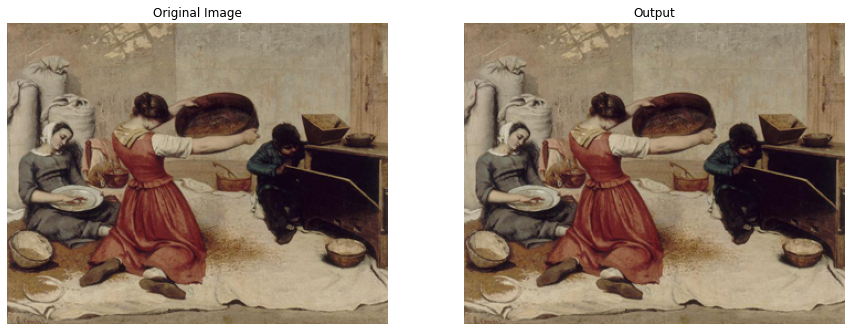

In [56]:
image = cv2.imread('/content/test_detec.jpg')
hogDetectFaces(image, hog_face_detector, display=True)

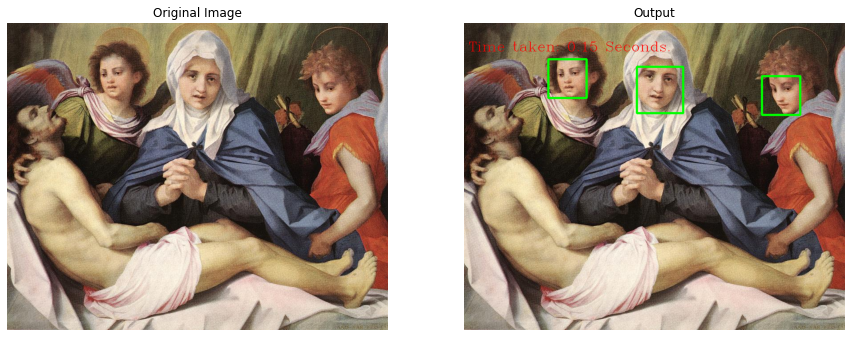

In [53]:
image = cv2.imread('/content/andrea-del-sarto_lament-of-christ.jpg')
hogDetectFaces(image, hog_face_detector, display=True)

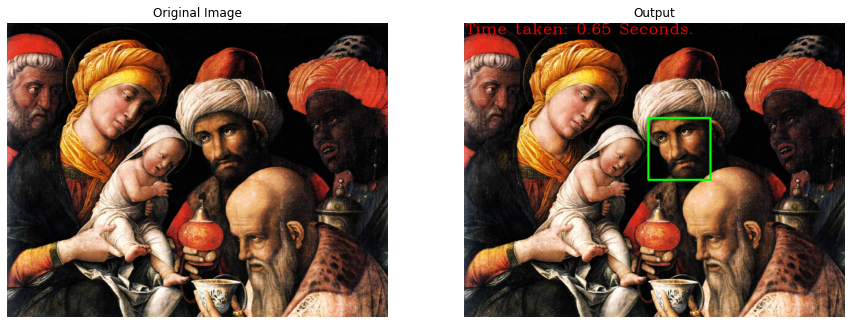

In [54]:
image = cv2.imread('/content/andrea-mantegna_adoration-of-the-magi-1500.jpg')
hogDetectFaces(image, hog_face_detector, display=True)

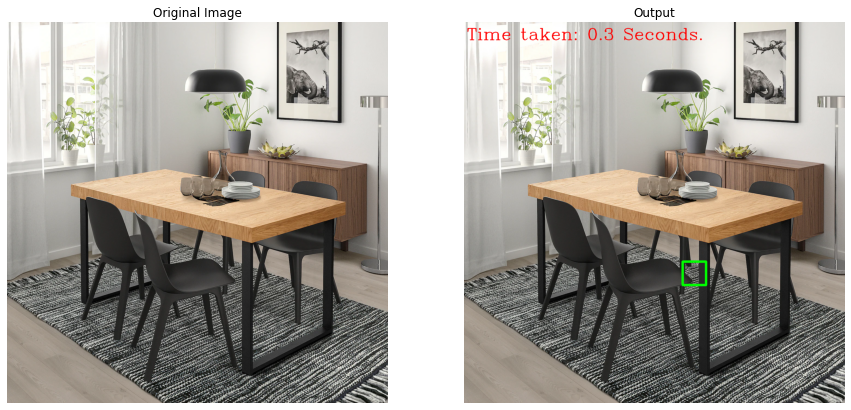

In [55]:
image = cv2.imread('/content/tarsele-table-extensible-plaque-chene-noir__0944977_pe797515_s5.jpg')
hogDetectFaces(image, hog_face_detector, display=True)

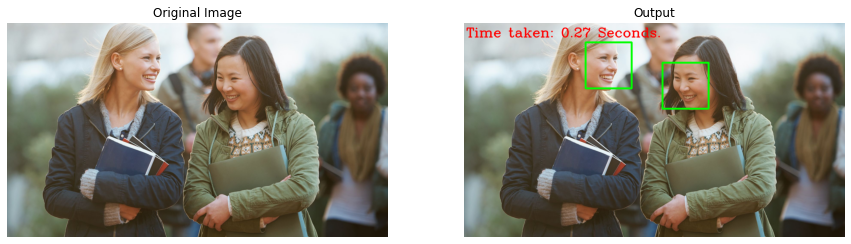

In [58]:
image = cv2.imread('/content/593186682300003b0034875d.jpeg')
hogDetectFaces(image, hog_face_detector, display=True)